## Image quantization using K-means clustering

* A compression technique that explains a range of values by a single quantum value.
* Image quantization is lossy but it reduces an image size.
* Steps to apply Image quantization-
  * Load and process image
  * Apply mini batch k-means
  * predict centroid label for each batch
  * Convert back to original image shape

In [262]:
import os
import numpy as np
from PIL import Image, ImageOps
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

#### Read and process image

In [263]:
"""
 - read image and resize into 512x512
 - get metadata like size and shape
 - apply np reshape
"""
def read_and_process_image(file_path):
    # resize - 512x512
    orig_image = Image.open(file_path).resize((512, 512))
    orig_image_size = orig_image.size
    orig_image_size_in_kb = os.stat(file_path).st_size / 1024
    orig_image_data = orig_image.getdata()
    np_image_array = np.array(orig_image_data)
    # reshape - keep only height width and channel dimensions
    np_image_array = np_image_array.reshape(*orig_image.size, -1)
    # store data into dictionary
    image_data_dict = {
        'orig_image': orig_image,
        'orig_image_size': orig_image_size,
        'orig_image_data': orig_image_data,
        'np_image_array': np_image_array,
        'orig_image_size_in_kb': orig_image_size_in_kb
    }
    return image_data_dict

In [264]:
image_data_dict = read_and_process_image('image1.jpeg')
print(f"original image size: {image_data_dict['orig_image'].size}")
print(f"original image size in KB: {image_data_dict['orig_image_size_in_kb']} KB")
print(f"Numpy image array shape: {image_data_dict['np_image_array'].shape}")

X = image_data_dict['np_image_array']

original image size: (512, 512)
original image size in KB: 1042.119140625 KB
Numpy image array shape: (512, 512, 3)


#### Visualize original image

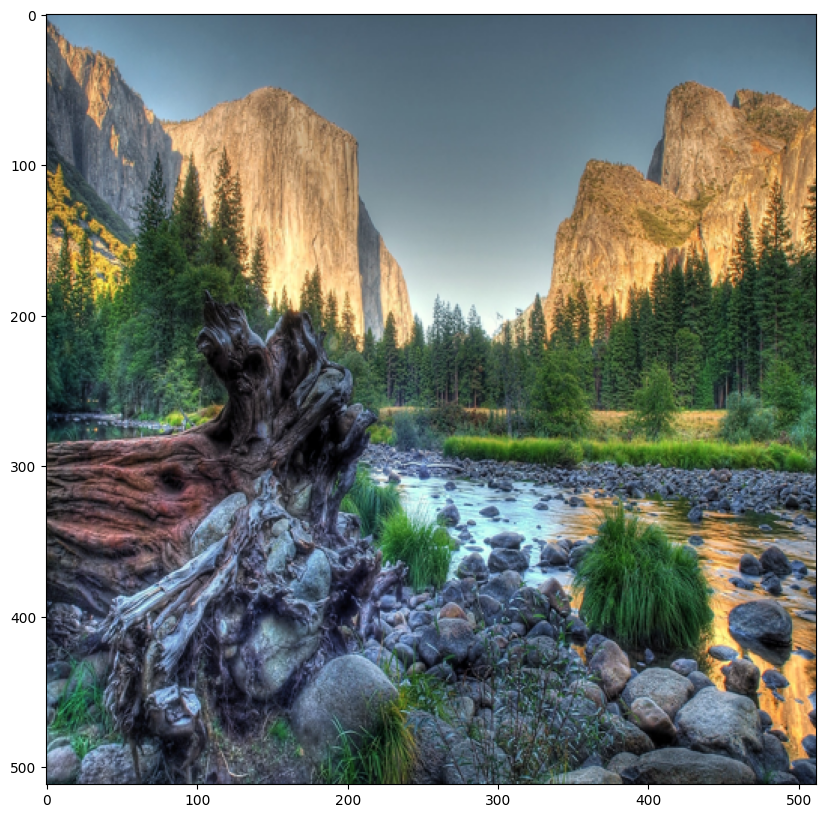

In [265]:
plt.rcParams['figure.figsize'] = (10,10)
plt.imshow(image_data_dict['orig_image'])
plt.show()

#### Dsiplay image histogram - pixels distribution

Text(0, 0.5, 'Density')

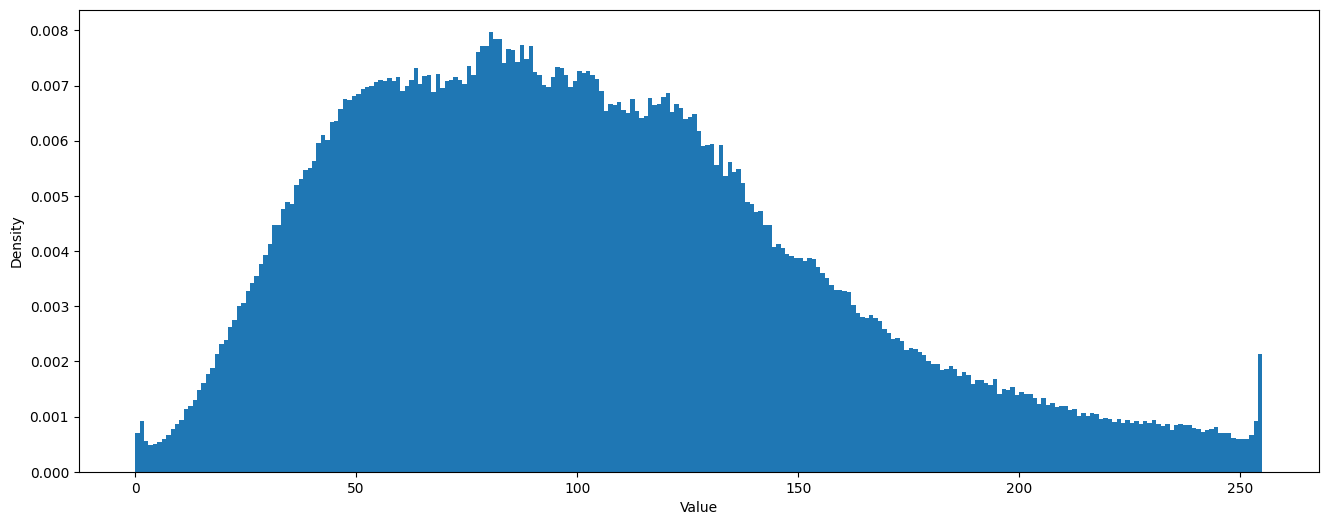

In [266]:
# visualize image histogram
# pixels distribution
plt.figure(figsize=(16, 6))
plt.hist(image_data_dict['np_image_array'].ravel(), bins=np.arange(256), density=True, linewidth=0)
plt.xlabel("Value")
plt.ylabel("Density")

#### Apply MiniBatchKMeans and perform quantization

Applying quantization with k = 1, 2, 4, 8, 16, 32

In [267]:
# apply quantization using k-means clustering
from sklearn.cluster import MiniBatchKMeans
def apply_quantization(X, K):
    min_batch_k = MiniBatchKMeans(K, compute_labels=False)  # ignore label compute for each batch
    min_batch_k.fit(X.reshape(-1, 1))

    # predict centroid label for each batch
    pred = min_batch_k.predict(X.reshape(-1, 1))
    quant_res = min_batch_k.cluster_centers_[pred]
    # reshape back to original image shape
    quant_img = np.uint8(quant_res.reshape(X.shape))
    return quant_img


def compute_bulk_quantization(X, K_values):
    quant_image_dict = {}
    for k in K_values:
        print(f'Quantizing with k={k}')
        quantized_img  = quantize_global(X, k)
        quant_image_dict[k] = quantized_img

    return quant_image_dict
    

def display_histogram(quantized_img):
    plt.figure(figsize=(16, 6))
    plt.hist(x.ravel(), bins=np.arange(256), density=True, linewidth=0, label="original")
    plt.hist(quantized_img.ravel(), bins=np.arange(256), density=True, linewidth=0, label="quantized")
    plt.xlabel("Value")
    plt.ylabel("Density")

In [268]:
# compute quant for bulk k values
K_values = [1, 2, 4, 8, 16, 32]
quant_image_dict = compute_bulk_quantization(X, K_values)

Quantizing with k=1
Quantizing with k=2
Quantizing with k=4


/Users/gopalcbala/Desktop/Jupyter_NB_Projects/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Users/gopalcbala/Desktop/Jupyter_NB_Projects/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Users/gopalcbala/Desktop/Jupyter_NB_Projects/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Quantizing with k=8
Quantizing with k=16


/Users/gopalcbala/Desktop/Jupyter_NB_Projects/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Users/gopalcbala/Desktop/Jupyter_NB_Projects/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Quantizing with k=32


/Users/gopalcbala/Desktop/Jupyter_NB_Projects/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


#### Histogram after quantization

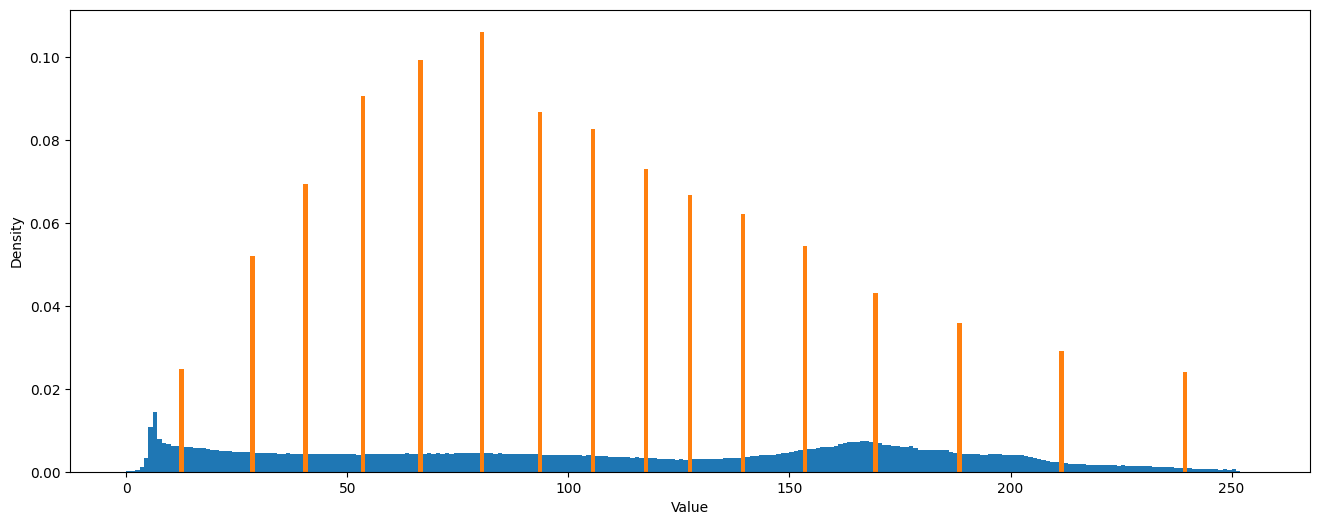

In [269]:
display_histogram(quant_image_dict[16])

#### Visualize quantized image-

After applying quantization with k = 1, 2, 4, 8, 16, 32

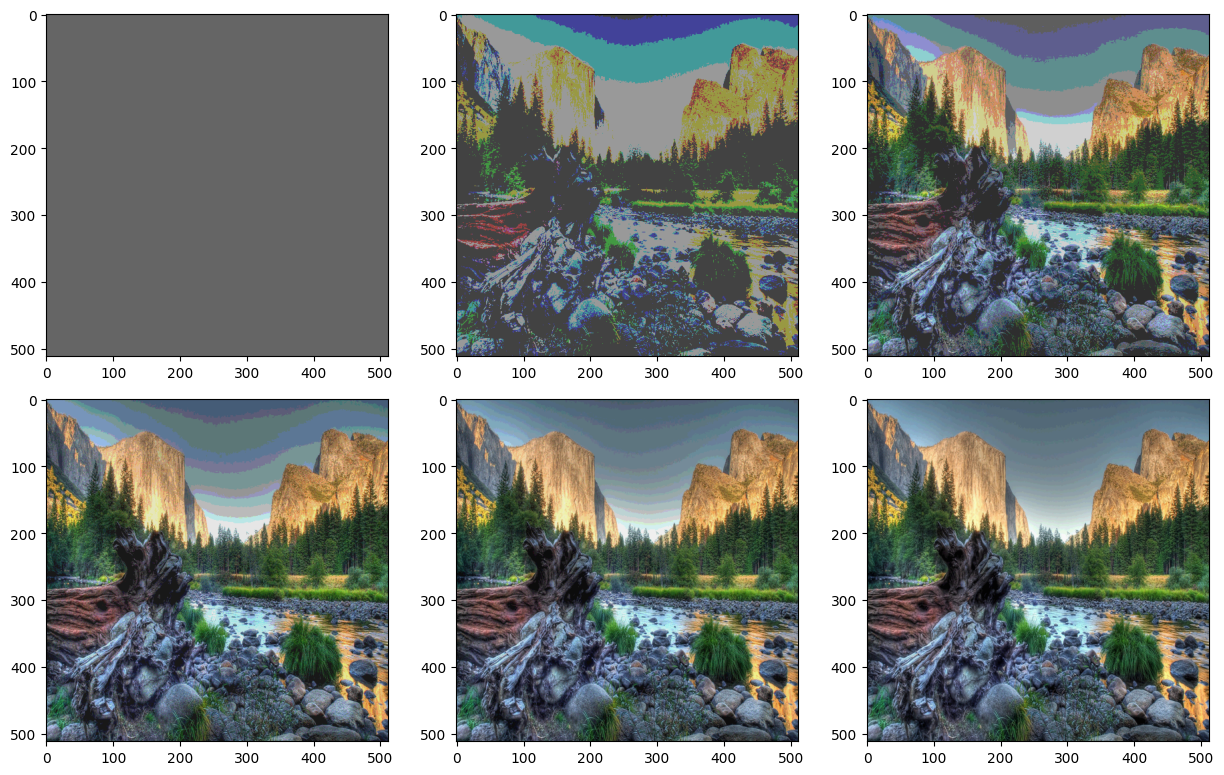

In [270]:
plt.rcParams["figure.figsize"] = (15,10)
f, axarr = plt.subplots(2, 3, gridspec_kw = {'hspace':0})
axarr[0,0].imshow(quant_image_dict[1])
axarr[0,1].imshow(quant_image_dict[2])
axarr[0,2].imshow(quant_image_dict[4])
axarr[1,0].imshow(quant_image_dict[8])
axarr[1,1].imshow(quant_image_dict[16])
axarr[1,2].imshow(quant_image_dict[32])